In [3]:
# -*- coding: utf-8 -*-
# 따릉이 데이터 셋 
import pandas as pd
import numpy as np
import matplotlib as plt

data = pd.read_csv("C:/Users/GSE/suicide/Bike/Bike_csv/predict_data.csv")#,encoding='CP949')

data =data.fillna(0) # 데이터에 nan 값 전부 0처리 
data.head()

,hour,minutes,count,대여/반납,holiday,weather,Rain,Month,Day,Day_w,Time,AM/PM,습도,풍속,Snow
0,0,0,20.000000,0,2,-3.2,0.0,1,1,1,0:00,1,40,0.5,0.0
1,0,30,20.500000,0,2,-3.2,0.0,1,1,1,0:30,1,40,0.5,0.0
2,1,0,20.000000,1,2,-3.3,0.0,1,1,1,1:00,1,41,0.7,0.0
3,2,0,16.250000,-1,2,-3.7,0.0,1,1,1,2:00,1,42,0.9,0.0
4,2,30,13.833333,-5,2,-3.7,0.0,1,1,1,2:30,1,42,0.9,0.0


In [4]:
# 날짜를 인덱스 처리
data['Time']
data = data.set_index(['Time'])      
data.index = pd.to_datetime(data.index)

In [5]:
# x값과 y값 구분
import pandas as pd
import numpy as np

# x: data / y : 결과값

x = data.drop(["count"], axis=1)
y = data["count"].astype(int)
#print(x)
y.mean()
y.median()

18.0

In [6]:
# data scaling StandardScaler 사용(표준화)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RubustScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
#sc = MinMaxScaler()
sc = RobustScaler()
#sc = Normalizer()
#sc = StandardScaler()
#x = sc.MinMaxScaler()
x = sc.fit_transform(x) # x_train data scaling
print(x)


[[-1.3        -1.          0.         ... -0.21428571 -0.82352941
   0.        ]
 [-1.3         0.          0.         ... -0.21428571 -0.82352941
   0.        ]
 [-1.2        -1.          0.33333333 ... -0.17857143 -0.70588235
   0.        ]
 ...
 [ 0.9         0.         -0.33333333 ...  0.21428571 -0.23529412
   0.        ]
 [ 1.         -1.         -0.66666667 ...  0.60714286 -0.35294118
   0.        ]
 [ 1.          0.         -0.66666667 ...  0.60714286 -0.35294118
   0.        ]]


In [7]:
#train,validation,test set 으로 나눔  

import numpy as np
train_size = int(len(y)* 0.6)
val_size = int(len(y)*0.8)
test_size = len(y)- val_size

train_x, test_x = np.array(x[0:train_size]),np.array(x[val_size:])
val_x, val_y = np.array(x[train_size:val_size]),np.array(y[train_size:val_size])
train_y, test_y = np.array(y[0:train_size]),np.array(y[val_size:])
print(train_size,",",val_size,",",test_size)

2055 , 2740 , 686


In [53]:
# randomforestregressorGridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer
rskfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)

param = {'n_estimators':[500,600,700,800,900,1000],
         'max_features':[13], 
        'max_depth': [10,20,30]}

r_reg = RandomForestRegressor(random_state =42)
search = GridSearchCV(r_reg,param, cv = rskfold,
                     scoring ='neg_mean_absolute_error',verbose = True)
                      #scoring =make_scorer(rmsle, greater_is_better=False))
                      #'mean_squared_error'
#'neg_mean_squared_error'
#.ravel
search.fit(train_x,train_y)
search.best_params_
pd.DataFrame(search.cv_results_)

Fitting 9 folds for each of 18 candidates, totalling 162 fits


C:\Users\GSE\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\GSE\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\GSE\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed: 15.7min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,mean_test_score,std_test_score,rank_test_score
0,2.853388,0.715284,0.077043,0.024991,10,13,500,"{'max_depth': 10, 'max_features': 13, 'n_estim...",-3.026327,-3.051523,-2.982062,-2.960527,-3.095232,-3.011832,-3.205475,-2.955579,-3.066214,-3.039654,0.074086,17
1,2.902542,0.378201,0.089226,0.046248,10,13,600,"{'max_depth': 10, 'max_features': 13, 'n_estim...",-3.025397,-3.055216,-2.978921,-2.957922,-3.100044,-3.001693,-3.208165,-2.965339,-3.062989,-3.039784,0.075083,18
2,4.210194,0.703827,0.109156,0.041043,10,13,700,"{'max_depth': 10, 'max_features': 13, 'n_estim...",-3.030537,-3.052501,-2.974398,-2.959233,-3.103086,-3.000753,-3.203102,-2.960127,-3.058830,-3.038344,0.074717,16
3,3.945794,0.522347,0.106410,0.015868,10,13,800,"{'max_depth': 10, 'max_features': 13, 'n_estim...",-3.027414,-3.050936,-2.973075,-2.956379,-3.107062,-3.003654,-3.190139,-2.960591,-3.058981,-3.036723,0.072245,15
4,6.049018,0.377151,0.149284,0.018589,10,13,900,"{'max_depth': 10, 'max_features': 13, 'n_estim...",-3.023813,-3.053347,-2.970026,-2.958230,-3.105909,-3.002867,-3.187713,-2.958325,-3.054958,-3.035280,0.071908,14
5,8.064223,0.836240,0.182960,0.010029,10,13,1000,"{'max_depth': 10, 'max_features': 13, 'n_estim...",-3.023547,-3.049563,-2.967720,-2.958179,-3.096963,-3.000347,-3.186124,-2.957496,-3.051253,-3.032621,0.070834,13
6,5.035518,0.293424,0.115520,0.006709,20,13,500,"{'max_depth': 20, 'max_features': 13, 'n_estim...",-2.557477,-2.680928,-2.469882,-2.566334,-2.610758,-2.575700,-2.727160,-2.496000,-2.628307,-2.590604,0.077535,10
7,4.836549,0.660588,0.116742,0.014984,20,13,600,"{'max_depth': 20, 'max_features': 13, 'n_estim...",-2.557711,-2.685775,-2.474122,-2.563589,-2.618643,-2.572796,-2.727641,-2.510069,-2.630616,-2.593758,0.076284,12
8,5.196569,0.303482,0.130949,0.013700,20,13,700,"{'max_depth': 20, 'max_features': 13, 'n_estim...",-2.561493,-2.684577,-2.472646,-2.562283,-2.621399,-2.568357,-2.723866,-2.504623,-2.624704,-2.591885,0.076141,11
9,6.122261,0.188380,0.145825,0.006901,20,13,800,"{'max_depth': 20, 'max_features': 13, 'n_estim...",-2.560477,-2.682794,-2.474744,-2.560000,-2.621219,-2.567949,-2.710090,-2.507059,-2.626636,-2.590412,0.072857,9


In [8]:
#randomforest regressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
r_reg = RandomForestRegressor(max_features = 13,
                              n_estimators =1000,
                              max_depth=30,
                              criterion = 'mse',
                              random_state =42,verbose=True)
r_reg



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features=13, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42,
                      verbose=True, warm_start=False)

AttributeError: 'RandomForestRegressor' object has no attribute 'evals_result'

In [10]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convert_Exp = True):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)

    # 평균을 낸다.
    mean_difference = difference.mean()

    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)

    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Fit regression model
""""""
eval_s = [(train_x,train_y),(val_x,val_y)]
params = {'n_estimators':70,
        'max_depth':9,
        'learning_rate': 0.07,
      'subsample' : 0.7,
      'colsample_bytree': 0.8,
      'colsample_bylevel': 0.5,
      'min_child_weight':4,
      'nthread':4,
      'objective':'reg:linear',
      'silent':1,
      'seed':37}
#clf = ensemble.GradientBoostingRegressor(**params)
xgb_clf = xgb.XGBRegressor(**params)
xgb_clf.fit(train_x,train_y,eval_metric=['rmse','mae'],eval_set=eval_s,verbose=True)

mse = mean_squared_error(val_y, xgb_clf.predict(val_x))
print("MSE: %.4f" % mse)
#print(xgb_clf.evals_result)
# make predictions for test data
y_pred = xgb_clf.predict(test_x)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [62]:
from sklearn.metrics import make_scorer, mean_squared_error
#np.mean(cross_val_score(r_reg, train_x, train_y, cv=5, scoring=rmsle_scorer))
scorer = make_scorer(mean_squared_error, False)
cv_score = np.sqrt(-cross_val_score(r_reg, train_x, train_y,cv=5,scoring = scorer))



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   23.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   22.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   21.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

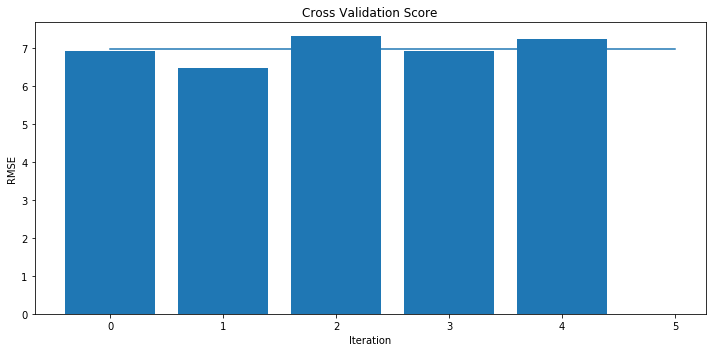

In [63]:
import matplotlib as plt
import matplotlib.pyplot as plt

plt.figure(figsize =(10,5))
plt.bar(range(len(cv_score)),cv_score)
plt.title('Cross Validation Score')
plt.ylabel('RMSE')
plt.xlabel('Iteration')

plt.plot(range(len(cv_score)+1),[cv_score.mean()] * (len(cv_score) + 1))
plt.tight_layout()

In [21]:
# crossvalidation 5번 scoring = rmsle_scorer rmsle 사용
%time score = np.mean(cross_val_score(r_reg, train_x, train_y, cv=5, scoring=rmsle_scorer))
score = score.mean()
print("Score= {0:.5f}".format(score))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   57.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   56.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

Wall time: 5min
Score= 0.43378


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished


In [11]:
# train data fit
r_reg.fit(train_x,train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features=13, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42,
                      verbose=True, warm_start=False)

In [15]:
from sklearn.metrics import mean_squared_error

#rf = RandomForestRegressor(n_estimators=1)
for iter in range(50):
    r_reg.fit(train_x, train_y)
    y_train_predicted = r_reg.predict(train_x)
    y_val_predicted = r_reg.predict(val_x)
    mse_train = mean_squared_error(train_y, y_train_predicted)
    mse_test = mean_squared_error(val_y, y_val_predicted)
    print("Iteration: {} Train mse: {} val mse: {}".format(iter, mse_train, mse_test))
    rf.n_estimators += 1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 0 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 1 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 2 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 3 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 4 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 5 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 6 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 7 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 8 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 9 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 10 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 11 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 12 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 13 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 14 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 15 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 16 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 17 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 18 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 19 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 20 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 21 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 22 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 23 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 24 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 25 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 26 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 27 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 28 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 29 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 30 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 31 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 32 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 33 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 34 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 35 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 36 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 37 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 38 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 39 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 40 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 41 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 42 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 43 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 44 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 45 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 46 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 47 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Iteration: 48 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration: 49 Train mse: 1.0706968843163018 Test mse: 40.92386599124087


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [57]:
import sklearn.metrics as metrics
import math
# Show model results of training set
train_pred_y = r_reg.predict(train_x)
mae = metrics.mean_absolute_error(train_y,train_pred_y)
mse = metrics.mean_squared_error(train_y,train_pred_y)
#rmsle = rmsle(train_y,train_pred_y)
#rmsle_scorer = make_scorer(rmsle)
#print(rmsle_scorer)

print ("TRAINING SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("RMSLE:              ", rmsle(train_pred_y,train_y))
print ("r2:                 ", r_reg.score(train_x,train_y))
print ("feature_importances:",r_reg.feature_importances_)
print ("n_features:         ",r_reg.n_features_)
print ("n_outputs:          ",r_reg.n_outputs_)
print ("last column (% Iron Concentrate) is the highest feature_importances")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


TRAINING SET
MAE:                 0.7756005839416058
RMSE:                1.1122896237689897
RMSLE:               0.08810162277108691
r2:                  0.9757736638775829
feature_importances: [0.24941098 0.0082618  0.05308244 0.02233183 0.15955005 0.00025899
 0.03153047 0.14416259 0.1074109  0.00394324 0.11634141 0.07058049
 0.03313481]
n_features:          13
n_outputs:           1
last column (% Iron Concentrate) is the highest feature_importances


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [58]:
import sklearn.metrics as metrics
import math
# Show model results of training set
val_pred_y = r_reg.predict(val_x)
mae = metrics.mean_absolute_error(val_y,val_pred_y)
mse = metrics.mean_squared_error(val_y,val_pred_y)
rmsle = rmsle(val_y,val_pred_y)
print ("Validation SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("RMSLE:              ", rmsle)
print ("r2:                 ", r_reg.score(train_x,train_y))
print ("feature_importances:",r_reg.feature_importances_)
print ("n_features:         ",r_reg.n_features_)
print ("n_outputs:          ",r_reg.n_outputs_)
print ("last column (% Iron Concentrate) is the highest feature_importances")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Validation SET
MAE:                 0.8651430656934307
RMSE:                1.1983323087969253
RMSLE:               0.11225308137592666
r2:                  0.9757736638775829
feature_importances: [0.24941098 0.0082618  0.05308244 0.02233183 0.15955005 0.00025899
 0.03153047 0.14416259 0.1074109  0.00394324 0.11634141 0.07058049
 0.03313481]
n_features:          13
n_outputs:           1
last column (% Iron Concentrate) is the highest feature_importances


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished


In [13]:
for iter in range(50):
    r_reg.fit(train_x, train_y)
    y_train_predicted = rf.predict(train_x)
    y_test_predicted = rf.predict(test_x)
    mse_train = mean_squared_error(y_train, y_train_predicted)
    mse_test = mean_squared_error(y_test, y_test_predicted)
    print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
    rf.n_estimators += 1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.5s finished


NameError: name 'rf' is not defined

[Text(0.5, 1.0, 'val')]

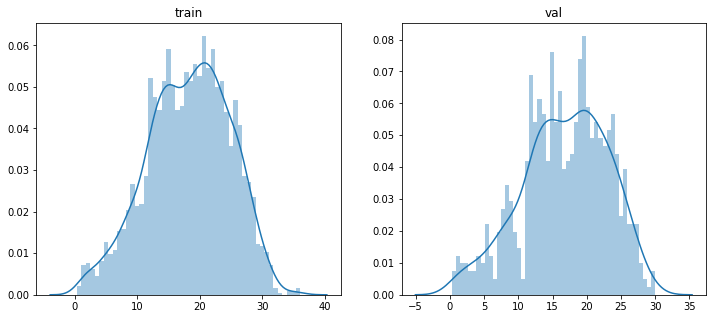

In [60]:
# 예측한 데이터를 시각화 해본다. 
import matplotlib.pyplot as plt
import seaborn as sns
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(train_pred_y,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(val_pred_y ,ax=ax2,bins=50)
ax2.set(title="val")
#sns.distplot(test_pred_y ,ax=ax3,bins=50)
#ax3.set(title="test")

In [33]:

# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
params = {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls','max_features' :11,}
params = {'n_estimators': 1000, 'max_depth': 30,
          'max_features' :11,}
r_reg = RandomForestRegressor(**params)
#clf = ensemble.GradientBoostingRegressor(**params)
#GradientBoostingRegressor(learning_rate = 0.05, max_depth =15, max_features = 11, min_samples_leaf =17, n_estimators =100  )
r_reg.fit(train_x,train_y)
#clf.fit(train_x,train_y)

mse = mean_squared_error(val_y, r_reg.predict(val_x))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, pred_y in enumerate(r_reg.staged_predict(test_x)):
    test_score[i] = r_reg.loss_(test_y, pred_y)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, r_reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = r_reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

MSE: 0.3618


AttributeError: 'RandomForestRegressor' object has no attribute 'staged_predict'

In [61]:
# train, test set으로 나눈다.
import numpy as np
train_size = int(len(y)* 0.8)
#test_size = len(y)- train_size
print(train_size,",",test_size)
#####################################
# train, test 나누기#
##########################33
#split to train and testing

train_x, test_x = np.array(x[0:train_size]),np.array(x[train_size:])
#val_x, val_y = np.array(x[train_size:val_size]),np.array(y[train_size:val_size])
train_y, test_y = np.array(y[0:train_size]),np.array(y[train_size:])
len(test_y)

2740 , 686


686

In [62]:
# train data fit
r_reg.fit(train_x,train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    9.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features=13, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42,
                      verbose=True, warm_start=False)

In [ ]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convert_Exp = True):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)

    # 평균을 낸다.
    mean_difference = difference.mean()

    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)

    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

In [66]:
# validation 측정 종료 후 8:2로 나뉜다 training 시키고 
import sklearn.metrics as metrics
import math
# Show model results of training set
train_pred_y = r_reg.predict(train_x)
mae = metrics.mean_absolute_error(train_y,train_pred_y)
mse = metrics.mean_squared_error(train_y,train_pred_y)
#rmsle = rmsle(train_y,train_pred_y)
#rmsle_scorer = make_scorer(rmsle)
#print(rmsle_scorer)

print ("TRAINING SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("RMSLE:              ", rmsle(train_pred_y,train_y))
print ("r2:                 ", r_reg.score(train_x,train_y))
print ("feature_importances:",r_reg.feature_importances_)
print ("n_features:         ",r_reg.n_features_)
print ("n_outputs:          ",r_reg.n_outputs_)
print ("last column (% Iron Concentrate) is the highest feature_importances")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


TRAINING SET
MAE:                 0.7756005839416058
RMSE:                1.1122896237689897
RMSLE:               0.08810162277108691
r2:                  0.9757736638775829
feature_importances: [0.24941098 0.0082618  0.05308244 0.02233183 0.15955005 0.00025899
 0.03153047 0.14416259 0.1074109  0.00394324 0.11634141 0.07058049
 0.03313481]
n_features:          13
n_outputs:           1
last column (% Iron Concentrate) is the highest feature_importances


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [67]:
# test 데이터 
import sklearn.metrics as metrics
import math
# Show model results of training set
test_pred_y = r_reg.predict(test_x)
mae = metrics.mean_absolute_error(test_y,test_pred_y)
mse = metrics.mean_squared_error(test_y,test_pred_y)
rmsle = rmsle(test_pred_y,test_y)
print ("TEST SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("RMSLE:               ", math.sqrt(mse))
print ("r2:                 ", r_reg.score(train_x,train_y))
print ("RMSLE:              ", rmsle)
print ("feature_importances:",r_reg.feature_importances_)
print ("n_features:         ",r_reg.n_features_)
print ("n_outputs:          ",r_reg.n_outputs_)
print ("last column (% Iron Concentrate) is the highest feature_importances")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


TEST SET
MAE:                 5.106516618075802
RMSE:                6.546184147755586
RMSLE:                6.546184147755586
r2:                  0.9757736638775829
RMSLE:               0.5041008234621941
feature_importances: [0.24941098 0.0082618  0.05308244 0.02233183 0.15955005 0.00025899
 0.03153047 0.14416259 0.1074109  0.00394324 0.11634141 0.07058049
 0.03313481]
n_features:          13
n_outputs:           1
last column (% Iron Concentrate) is the highest feature_importances


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.3s finished


[Text(0.5, 1.0, 'test')]

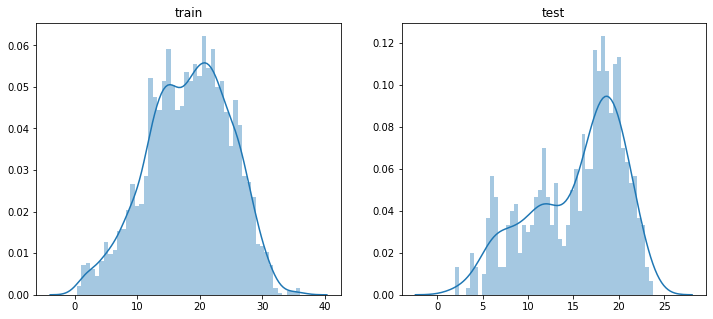

In [64]:
# 예측한 데이터를 시각화 해본다. 
import matplotlib.pyplot as plt
import seaborn as sns
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(train_pred_y,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(test_pred_y ,ax=ax2,bins=50)
ax2.set(title="test")